Sentiment Analysis means to identify the view or emotion behind a situation. It basically means to analyze and find the emotion or intent behind a piece of text or speech or any mode of communication.

Sentiment Analysis Model takes in a huge corpus of data having user reviews and finds a pattern and comes up with a conclusion based on real evidence rather than assumptions made on a small sample of data.

# Problem Statement

Sentiment analysis on text data using NLP and to build a predective system to classifiy the given input sentiment.

# Work Flow

1. Data Collection -> involves 2 text datasets of training data and text data
2. Data Analysis -> to understand the insights of the data, what is this data all about and other such kind of things
3. Data Pre-processing -> converting it into vectors before passing it to the machine learning model
4. Model Builing -> train an ML model for Sentiment Classification as positive or negative
5. Model Evaluation -> evaluating on test data using various evaluation metrics
6. Predicting for Custom Input -> build a predective system to classifiy to different classes

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from wordcloud import WordCloud                # library to visualize text data
import re                                      # to pre-process the strings as per the given regular expression

import nltk                                    # Natural Language Toolkit 
from nltk.corpus import stopwords              # collection of words that don’t provide any meaning to a sentence
from nltk.stem import WordNetLemmatizer        # to convert different forms of words into a single item 

from sklearn.feature_extraction.text import CountVectorizer     # transforms text to vectors
from sklearn.model_selection import GridSearchCV                # hyperparameter tuning

# Data Collection

As the data is in text format, separated by semicolons and without column names, we will create the data frame with read_csv() and parameters as “delimiter” and “names”.

In [2]:
# loading the training data

train_data = pd.read_csv('train.txt', delimiter=';', names=['text', 'label'])
train_data.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
train_data.shape

(16000, 2)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [5]:
# loading the validation data

val_data = pd.read_csv('test.txt', delimiter=';', names=['text', 'label'])
val_data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
val_data.shape

(2000, 2)

In [7]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


# Data Analysis

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

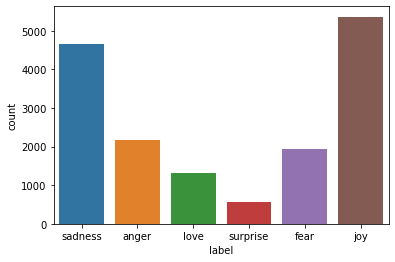

In [8]:
# visualization of different labels present in the data

sb.countplot(train_data.label)

As we can see that, we have 6 labels or targets in the dataset. We can make a Multi-class classifier for Sentiment Analysis. we will label different integers for these different classes.

In [9]:
# create a custom encoder to convert categorical target labels to numerical form

def custom_encoder(data):
    data.replace(to_replace ="surprise", value =0, inplace=True)
    data.replace(to_replace ="love", value =1, inplace=True)
    data.replace(to_replace ="joy", value =2, inplace=True)
    data.replace(to_replace ="fear", value =3, inplace=True)
    data.replace(to_replace ="anger", value =4, inplace=True)
    data.replace(to_replace ="sadness", value =5, inplace=True)

In [10]:
custom_encoder(train_data['label'])

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

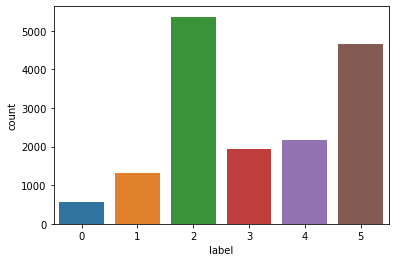

In [11]:
sb.countplot(train_data.label)

In [12]:
train_data.head()

,text,label
0,i didnt feel humiliated,5
1,i can go from feeling so hopeless to so damned...,5
2,im grabbing a minute to post i feel greedy wrong,4
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,4


In [13]:
train_data.label.value_counts()

2    5362
5    4666
4    2159
3    1937
1    1304
0     572
Name: label, dtype: int64

# Data Pre-processing

Pre-processing on the data before converting it into vectors and passing it to the machine learning model.

In [14]:
# object of WordNetLemmatizer

lm = WordNetLemmatizer()

- iterating through each record and using regualr expression, we will get rid of any characters apart from alphabets
- convert the string to lowercase
- check for stopwords in the data and get rid of them
- perform lemmatization on each word,i.e. change the different forms of word into a single item called as lemma

In [15]:
# create a function for pre-processing of data

def text_transformation(data_col):
    
    corpus = []
    
    for item in data_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [16]:
corpus = text_transformation(train_data['text'])

Now, we will create a **Word Cloud**. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed.

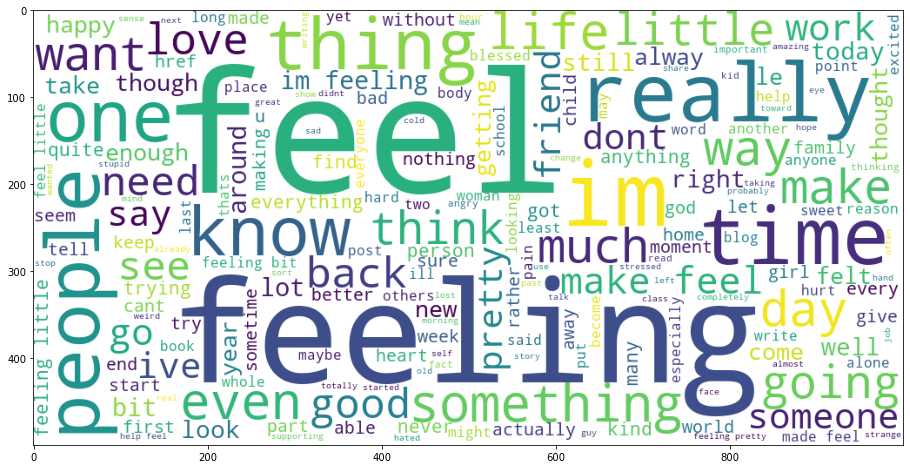

In [17]:
from matplotlib import style,rcParams

rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

**Bag of Words**

It describes the total occurrence of words within a document.

Bag of Words Model(BOW) is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

In [18]:
# converting the text data into vectors, by fitting and transforming the corpus that we have created.

cv = CountVectorizer(ngram_range=(1,2))     # ngram_range as (1,2) signifies a bigram
# Ngram is a sequence of ‘n’ of words in a row or sentence.
 
x_train = cv.fit_transform(corpus)
y_train = train_data.label

# Model Building

We will be using **Logistic Regression**, and we will tune the hyperparameters using GridSearchCV.

In [19]:
# loading the logistic regression model
from sklearn.linear_model import LogisticRegression

model_logistic_reg  = LogisticRegression().fit(x_train, y_train)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# accuracy of training data
from sklearn.metrics import accuracy_score

x_train_log = model_logistic_reg.predict(x_train)
training_accuracy_log = accuracy_score(x_train_log, y_train)
training_accuracy_log

0.997125

# Model Evaluation

In [21]:
x_test, y_test = val_data.text, val_data.label

# encode the labels into two classes , 0 and 1
custom_encoder(y_test)

# pre-processing of text
test_corpus = text_transformation(x_test)

# convert text data into vectors
test_data = cv.transform(test_corpus)

# predict the target
predictions = model_logistic_reg.predict(test_data)

Evaluation Metrics

- Accuracy Score – no. of correctly classified instances/total no. of instances
- Precision Score – the ratio of correctly predicted instances over total positive instances
- Recall Score – the ratio of correctly predicted instances over total instances in that class
- Confusion Matrix – a table used to describe the classification models

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[ 41,   0,  10,  13,   0,   2],
       [  0, 118,  36,   0,   2,   3],
       [  4,  29, 654,   2,   2,   4],
       [  7,   1,   6, 185,   9,  16],
       [  0,   0,  13,   4, 238,  20],
       [  1,   2,  15,   4,  15, 544]], dtype=int64)

In [23]:
test_accuracy_log = accuracy_score(y_test, predictions)
test_accuracy_log

0.89

In [24]:
# Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.773585  0.621212  0.689076        66
           1   0.786667  0.742138  0.763754       159
           2   0.891008  0.941007  0.915325       695
           3   0.889423  0.825893  0.856481       224
           4   0.894737  0.865455  0.879852       275
           5   0.923599  0.936317  0.929915       581

    accuracy                       0.890000      2000
   macro avg   0.859836  0.822004  0.839067      2000
weighted avg   0.888641  0.890000  0.888579      2000



we can see that our Logistic Regression model performed very well in classifying the sentiments, with an Accuracy score of of approx 89%

# Predicting for Custom Input:

In [25]:
def expression_check(prediction_input):
    
    if prediction_input == 0:
        print("It's a surprise Sentiment.")
    elif prediction_input == 1:
        print("It's a love Sentiment.")
    elif prediction_input == 2:
        print("It's a joy Sentiment.")
    elif prediction_input == 3:
        print("It's a fear Sentiment.")
    elif prediction_input == 4:
        print("It's a anger Sentiment.")
    elif prediction_input == 5:
        print("It's a sadness Sentiment.")
    else:
        print("Invalid Statement.")

In [26]:
def sentiment_predictor(input):
    
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model_logistic_reg.predict(transformed_input)
    expression_check(prediction)

In [27]:
input1 = ["i am just feeling overwhelmed and there is nothing i can do to fix it"]     # surprise -> 0
input2 = ["i have a lot to learn i feel like people are supportive of me"]     # love -> 1
input3 = ["i feel bitchy but not defeated yet"]                # anger -> 4
input4 = ["i just feel like all my efforts are in vain and a waste of time"]    # sadness -> 5
input5 = ["i expected to feel more but nope i dont and thats a pleasant surprise"]    # joy -> 2
input6 = ["i just know to begin with i am going to feel shy about it"]          # fear -> 3


sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)
sentiment_predictor(input4)
sentiment_predictor(input5)
sentiment_predictor(input6)

It's a surprise Sentiment.
It's a love Sentiment.
It's a anger Sentiment.
It's a sadness Sentiment.
It's a joy Sentiment.
It's a fear Sentiment.


**We can see that our model accurately classified all the sentiments correctly**

# Naive Bayes Classifier

**Model Building**

In [28]:
# Loading Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB().fit(x_train,y_train)

In [29]:
# accuracy of training data

x_train_nb = model_naive.predict(x_train)
training_accuracy_nb = accuracy_score(x_train_nb, y_train)
training_accuracy_nb

0.96325

**Model Evaluation**

In [30]:
# predict the target
predictions = model_naive.predict(test_data)

In [31]:
# confusion matrix
confusion_matrix(y_test, predictions)

array([[  5,   0,  34,  10,   0,  17],
       [  0,  29,  99,   0,   1,  30],
       [  0,   4, 678,   0,   0,  13],
       [  0,   0,  43, 116,   6,  59],
       [  0,   0,  68,   3, 132,  72],
       [  0,   0,  30,   2,   0, 549]], dtype=int64)

In [32]:
test_accuracy_nb = accuracy_score(y_test, predictions)
test_accuracy_nb

0.7545

In [33]:
# Classification report
print(metrics.classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.075758  0.140845        66
           1   0.878788  0.182390  0.302083       159
           2   0.712185  0.975540  0.823315       695
           3   0.885496  0.517857  0.653521       224
           4   0.949640  0.480000  0.637681       275
           5   0.741892  0.944923  0.831188       581

    accuracy                       0.754500      2000
   macro avg   0.861334  0.529411  0.564772      2000
weighted avg   0.795619  0.754500  0.717101      2000



we can see that our Naive Bayes model performed good in classifying the sentiments, with an Accuracy score of of approx 75%

**Predicting for Custom Input:**

In [34]:
def sentiment_predictor(input):
    
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model_naive.predict(transformed_input)
    expression_check(prediction)

In [35]:
input1 = ["i am just feeling overwhelmed and there is nothing i can do to fix it"]     # surprise -> 0
input2 = ["i have a lot to learn i feel like people are supportive of me"]     # love -> 1
input3 = ["i feel bitchy but not defeated yet"]                # anger -> 4
input4 = ["i just feel like all my efforts are in vain and a waste of time"]    # sadness -> 5
input5 = ["i expected to feel more but nope i dont and thats a pleasant surprise"]    # joy -> 2
input6 = ["i just know to begin with i am going to feel shy about it"]          # fear -> 3


sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)
sentiment_predictor(input4)
sentiment_predictor(input5)
sentiment_predictor(input6)

It's a fear Sentiment.
It's a joy Sentiment.
It's a anger Sentiment.
It's a sadness Sentiment.
It's a joy Sentiment.
It's a fear Sentiment.


We can see that our Naive Bayes model is only able to classify 4/6 sentiments correctly. 

# SVM Classifier

**Model Building**

In [36]:
# Loading Support Vector Machine Model
from sklearn import svm

model_svm = svm.SVC(kernel='linear').fit(x_train,y_train)

In [37]:
# accuracy of training data

x_train_svm = model_svm.predict(x_train)
training_accuracy_svm = accuracy_score(x_train_svm, y_train)
training_accuracy_svm

0.9975625

**Model Evaluation**

In [38]:
# predict the target
predictions = model_svm.predict(test_data)

In [39]:
# confusion matrix
confusion_matrix(y_test, predictions)

array([[ 43,   0,   7,  14,   0,   2],
       [  1, 122,  35,   0,   0,   1],
       [  9,  34, 640,   4,   4,   4],
       [  8,   1,   4, 190,   9,  12],
       [  2,   2,   9,   5, 241,  16],
       [  5,   4,  13,   6,  20, 533]], dtype=int64)

In [40]:
test_accuracy_svm = accuracy_score(y_test, predictions)
test_accuracy_svm

0.8845

In [41]:
# Classification report
print(metrics.classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.632353  0.651515  0.641791        66
           1   0.748466  0.767296  0.757764       159
           2   0.903955  0.920863  0.912331       695
           3   0.867580  0.848214  0.857788       224
           4   0.879562  0.876364  0.877960       275
           5   0.938380  0.917384  0.927763       581

    accuracy                       0.884500      2000
   macro avg   0.828383  0.830273  0.829233      2000
weighted avg   0.885203  0.884500  0.884763      2000



we can see that our SVM Classifier model performed very well in classifying the sentiments, with an Accuracy score of of approx 88%

**Predicting for Custom Input:**

In [42]:
def sentiment_predictor(input):
    
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model_svm.predict(transformed_input)
    expression_check(prediction)

In [43]:
input1 = ["i am just feeling overwhelmed and there is nothing i can do to fix it"]     # surprise -> 0
input2 = ["i have a lot to learn i feel like people are supportive of me"]     # love -> 1
input3 = ["i feel bitchy but not defeated yet"]                # anger -> 4
input4 = ["i just feel like all my efforts are in vain and a waste of time"]    # sadness -> 5
input5 = ["i expected to feel more but nope i dont and thats a pleasant surprise"]    # joy -> 2
input6 = ["i just know to begin with i am going to feel shy about it"]          # fear -> 3


sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)
sentiment_predictor(input4)
sentiment_predictor(input5)
sentiment_predictor(input6)

It's a surprise Sentiment.
It's a love Sentiment.
It's a anger Sentiment.
It's a sadness Sentiment.
It's a joy Sentiment.
It's a fear Sentiment.


We can see that our SVM Classifier model accurately classified all the sentiments correctly

# K Nearest Neighbours

**Model Building**

In [44]:
# importing the K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# fit the training data into the classifier
model_knn.fit(x_train, y_train)

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.7430625

In [45]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(model_knn, parameters, scoring='accuracy', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.1min finished


In [46]:
# optimum parameter values
search.best_params_

{'n_neighbors': 3}

In [47]:
model_knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [48]:
# accuracy of training data

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.81375

**Model Evaluation**

In [49]:
# predict the target
predictions = model_knn.predict(test_data)

In [50]:
# confusion matrix
confusion_matrix(y_test, predictions)

array([[ 22,   5,  21,   8,   2,   8],
       [  4,  83,  44,   1,  10,  17],
       [ 18, 102, 498,   6,  29,  42],
       [ 23,  24,  66,  78,  12,  21],
       [  9,  39,  78,  13, 102,  34],
       [ 18,  76, 153,  11,  26, 297]], dtype=int64)

In [51]:
test_accuracy_knn = accuracy_score(y_test, predictions)
test_accuracy_knn

0.54

In [52]:
# Classification report
print(metrics.classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.234043  0.333333  0.275000        66
           1   0.252280  0.522013  0.340164       159
           2   0.579070  0.716547  0.640514       695
           3   0.666667  0.348214  0.457478       224
           4   0.563536  0.370909  0.447368       275
           5   0.708831  0.511188  0.594000       581

    accuracy                       0.540000      2000
   macro avg   0.500738  0.467034  0.459087      2000
weighted avg   0.587075  0.540000  0.544005      2000



we can see that our KNN Classifier model is not performed good in classifying the sentiments, with an Accuracy score of of approx 54%

**Predicting for Custom Input:**

In [53]:
def sentiment_predictor(input):
    
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model_knn.predict(transformed_input)
    expression_check(prediction)

In [54]:
input1 = ["i am just feeling overwhelmed and there is nothing i can do to fix it"]     # surprise -> 0
input2 = ["i have a lot to learn i feel like people are supportive of me"]     # love -> 1
input3 = ["i feel bitchy but not defeated yet"]                # anger -> 4
input4 = ["i just feel like all my efforts are in vain and a waste of time"]    # sadness -> 5
input5 = ["i expected to feel more but nope i dont and thats a pleasant surprise"]    # joy -> 2
input6 = ["i just know to begin with i am going to feel shy about it"]          # fear -> 3


sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)
sentiment_predictor(input4)
sentiment_predictor(input5)
sentiment_predictor(input6)

It's a surprise Sentiment.
It's a sadness Sentiment.
It's a anger Sentiment.
It's a joy Sentiment.
It's a love Sentiment.
It's a fear Sentiment.


We can see that our KNN Classifier model is only able to classify 3/6 sentiments correctly.

# Decision Tree Classifier

**Model Building**

In [55]:
# importing the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
model_tree = DecisionTreeClassifier()

# fit the training data into the classifier
model_tree.fit(x_train, y_train)

pred_train_tree = model_tree.predict(x_train)
training_accuracy_tree = accuracy_score(pred_train_tree, y_train)
training_accuracy_tree

0.99775

In [56]:
# optimizing model parameters
from sklearn.model_selection import GridSearchCV   

parameters = [{'criterion':['gini','entropy']}]
search = GridSearchCV(model_tree, parameters, scoring='accuracy', cv=5, verbose=True, n_jobs=-1).fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.0s finished


In [57]:
# optimum parameter values
search.best_params_

{'criterion': 'gini'}

In [58]:
model_tree = DecisionTreeClassifier(criterion='gini').fit(x_train, y_train)

In [59]:
# accuracy of training data

pred_train_tree = model_tree.predict(x_train)
training_accuracy_tree = accuracy_score(pred_train_tree, y_train)
training_accuracy_tree

0.99775

**Model Evaluation**

In [60]:
# predict the target
predictions = model_tree.predict(test_data)

In [61]:
# confusion matrix
confusion_matrix(y_test, predictions)

array([[ 42,   0,  10,  11,   1,   2],
       [  2, 118,  33,   0,   4,   2],
       [  8,  39, 613,   5,  11,  19],
       [ 16,   2,   1, 185,   8,  12],
       [  2,   2,   2,   5, 256,   8],
       [  4,   6,  12,  16,  22, 521]], dtype=int64)

In [62]:
test_accuracy_tree = accuracy_score(y_test, predictions)
test_accuracy_tree

0.8675

In [63]:
# Classification report
print(metrics.classification_report(y_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.567568  0.636364  0.600000        66
           1   0.706587  0.742138  0.723926       159
           2   0.913562  0.882014  0.897511       695
           3   0.833333  0.825893  0.829596       224
           4   0.847682  0.930909  0.887348       275
           5   0.923759  0.896730  0.910044       581

    accuracy                       0.867500      2000
   macro avg   0.798748  0.819008  0.808071      2000
weighted avg   0.870608  0.867500  0.868530      2000



we can see that our Decision Tree Classifier model performed well in classifying the sentiments, with an Accuracy score of of approx 87%

**Predicting for Custom Input:**

In [64]:
def sentiment_predictor(input):
    
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model_tree.predict(transformed_input)
    expression_check(prediction)

In [65]:
input1 = ["i am just feeling overwhelmed and there is nothing i can do to fix it"]     # surprise -> 0
input2 = ["i have a lot to learn i feel like people are supportive of me"]     # love -> 1
input3 = ["i feel bitchy but not defeated yet"]                # anger -> 4
input4 = ["i just feel like all my efforts are in vain and a waste of time"]    # sadness -> 5
input5 = ["i expected to feel more but nope i dont and thats a pleasant surprise"]    # joy -> 2
input6 = ["i just know to begin with i am going to feel shy about it"]          # fear -> 3


sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)
sentiment_predictor(input4)
sentiment_predictor(input5)
sentiment_predictor(input6)

It's a surprise Sentiment.
It's a love Sentiment.
It's a anger Sentiment.
It's a sadness Sentiment.
It's a joy Sentiment.
It's a fear Sentiment.


We can see that our Decision Tree Classifier model accurately classified all the sentiments correctly

# Comparison

Decreasing order of accuracy is depicted as:

- Logistic Regression - 0.89
- SVM Classifier - 0.8845
- Decision Tree - 0.8675 
- Naive Bayes - 0.7545
- KNN Classifier - 0.54

The results are highly clear that only Logistic Regression, SVM Classifier & Decision Tree Classifier models are good in classifying the seniments correctly. Logistic regression is the most accurate model because its ability to handle Multi-class classification. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.